# Basic Python Refresh

This first exercise code aims to review the basic functions to analyze a database. 
<br> Social media text information are often provided as a database where every row corresponds to a different text (tweet or post) and the columns to the attributes associated with that text (author username, date, location etc...). 

First of all, we need to import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ast import literal_eval

Then we need to connect this code with a Drive folder where the data are stored.

The file we are going to use is a CSV. We use the Pandas function read_csv to open it. These tweets are collected using Twitter API and a Python script. A query for this high-frequency hashtag (#covid19) is run on a daily basis for a certain time period, to collect a larger number of tweets samples. (Data source: https://www.kaggle.com/datasets/gpreda/covid19-tweets?resource=download)

In [9]:
url = 'https://raw.githubusercontent.com/SURGEDataHub/Intermediate-Social-Media-Analysis/main/Module%201/covid19_tweets.csv'
df = pd.read_csv(url)

Then we take a look at the first 10 lines of data of this database: each row corresponds to a tweet and provides information about user name, location, number of friends and followers, date, text of the tweet, hashtags, source, and if it is a retweet.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [11]:
df.head(10)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']",Twitter Web App,False
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...,"['COVID19', 'Recruiting']",Buffer,False
7,Derbyshire LPC,NaN,NaN,2012-02-03 18:08:10,608,355,95,False,2020-07-25 12:27:00,You now have to wear face coverings when out s...,NaN,TweetDeck,False
8,Prathamesh Bendre,NaN,"A poet, reiki practitioner and a student of law.",2015-04-25 08:15:41,25,29,18,False,2020-07-25 12:26:59,Praying for good health and recovery of @Chouh...,"['covid19', 'covidPositive']",Twitter for Android,False
9,Member of Christ 🇨🇳🇺🇸🇮🇳🇮🇩🇧🇷🇳🇬🇧🇩🇷🇺,👇🏻location at link below👇🏻,"Just as the body is one & has many members, & ...",2014-08-17 04:53:22,55201,34239,29802,False,2020-07-25 12:26:54,POPE AS GOD - Prophet Sadhu Sundar Selvaraj. W...,"['HurricaneHanna', 'COVID19']",Twitter for iPhone,False


## Querying
We can then filter this data. For example, (1) we can take all tweets only of those users that live in New York. Since some location say "New York, NY" and others "New York, NY USA" or just "New York, we need to find all location that contain the words *New York*.

In [12]:
df.loc[df['user_location'].str.contains('New York', regex=False, na=False)].head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
66,Matty A,"New York, NY USA",🇺🇸 Happily Married & a Proud Son of a U.S Nav...,2014-02-01 21:44:37,3924,4487,93575,False,2020-07-25 12:25:20,See this Instagram post by @facts.covid19 http...,NaN,Twitter Web App,False
107,Dr. Miguel Escalon,"New York, NY","Miguel Escalon, MD, MPH: Vice Chair, Director ...",2017-10-16 19:50:59,1299,994,2743,False,2020-07-25 12:24:05,#coronavirus #COVID19 disproportionately affec...,"['coronavirus', 'COVID19', 'Hispanic', 'Latinx']",Twitter for iPhone,False
131,Jessica Roland,"New York, NY",Policy & Advocacy @WomenDeliver | @FletcherSch...,2015-05-20 18:20:41,2314,1923,12908,False,2020-07-25 12:23:24,"""Think-piece on Gender and Climate Change in t...",['COVID19'],Twitter Web App,False
169,"Christine Murphy Estes, MM, MA, CCC-SLP","New York, NY","Speech-Language Pathologist, Voice Specialist,...",2018-10-07 02:31:06,622,1220,1121,False,2020-07-25 12:21:51,Your friendly weekend reminder that COVID didn...,"['wearamask', 'covid', 'covid19']",Twitter for iPhone,False


Or, (2) we can select only tweets of users with more than 1,000,000 followers.


---



In [13]:
df[df['user_followers']>=1000000].head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
25,Blood Donors India,"Mumbai, India",Focused on matching blood donors with those in...,2008-12-23 07:55:39,1215920,2047,19359,True,2020-07-25 12:26:26,#Kolar\nNeed #Blood Type : B-positive\nAt : J...,"['Kolar', 'Blood', 'COVID19']",Blood Donors India,False
77,IMF,"Washington, DC",Breaking news and alerts from the Internationa...,2009-03-18 16:13:51,1695520,444,182,True,2020-07-25 12:25:02,What economic measures are governments taking ...,['COVID19'],Hootsuite Inc.,False
120,Livemint,India,Breaking news and analyses of Indian and world...,2008-11-27 09:07:38,1902888,117,472,True,2020-07-25 12:23:44,"Bihar witnesses biggest single-day spike of 2,...",['Covid19'],Twitter Web App,False
208,Business Standard,India,Latest updates #news #LIVE coverage on #econom...,2009-06-01 08:52:08,1969497,380,140,True,2020-07-25 12:20:41,"From more than 1,000 deaths in the US, fourth ...",NaN,TweetDeck,False
235,CGTN,"Beijing, China",#SeeTheDifference with CGTN as we bring you st...,2013-01-24 03:18:59,13892795,69,104,True,2020-07-25 12:20:00,#APEC reaffirms #COVID19 economic recovery pri...,"['APEC', 'COVID19']",TweetDeck,False


(3) We may want to know how many tweets come from different sources (Twitter Web App, Twitter for Android, Twitter for iPhone...) and show the 10 most frequent. To do so, we need to group by source name and count how many element are present in each group. Then we sort this list from the most frequent source to the les frequent and we show only the first 10. 

In [14]:
df['id'] = df.index # we generate a column id equal to the index

In [15]:
df2 = df.groupby(['source'])[['id']].count()   
df2.sort_values(by=['id'], ascending=False).head(10)   # in df2 user_name contains the number of users by source

,id
source,
Twitter Web App,56891
Twitter for Android,40179
Twitter for iPhone,35472
TweetDeck,8543
Hootsuite Inc.,7321
Twitter for iPad,4336
Buffer,2728
Sprout Social,1833
Instagram,1759


### Exercise 1
Try now to find the 10 Twitter accounts that have published the largest number of tweets.

In [3]:
# write here your code




(4) Select only tweets posted between July 26 and July 30 and visualize their distribution by number of followers in an histagram. To do so, first we select only those tweets that have date in the above range and then we show the distribution by number of followers, i.e., how many tweets have beween 0 and 500,000 followers, between 500,000 and 1,000,000 followers and so on.

In [ ]:
df2020 = df 
df2020['date'] = pd.to_datetime(df2020['date'])
mask = (df2020['date'] > '2020-7-25') & (df2020['date'] <= '2020-7-30')
df2020 = df2020.loc[mask]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3754682210>]],
      dtype=object)

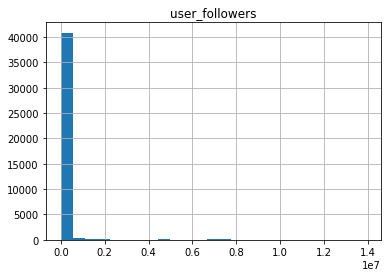

In [ ]:
pd.DataFrame.hist(data=df2020, column='user_followers', bins=25)

Let's now select a subgroup of tweets and and count how frequenty they use an hashtag:
- first we select all users in New York, that are verified and that have some hashtags in their tweets.
- The ‘hashtags’ column consists of an array of hashtags separated by commas and wrapped in square brackets — looks just like a python list! Therefore, we can use the function *ast.literal_eval()* to convert the ‘tags’ column from string to list.
- Then with the finction *explode()* we can explode the list to rows.
- Finally we count the how many times any hashtag has been used and we visualize them in a bar chart.


In [ ]:
df4 = df.loc[(df['user_location'].str.contains('New York', regex=False, na=False)) & (df['user_verified']==True) & ~(df['hashtags'].isna())]

In [ ]:
df4['hashtags'] = df4['hashtags'].apply(literal_eval)
hashtags = df4.explode('hashtags')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
hashtags = hashtags.groupby(['hashtags'])[['id']].count()
hashtags10 = hashtags.sort_values(by=['id'], ascending=False).iloc[0:10,:] 
hashtags10

,id
hashtags,
COVID19,250
coronavirus,26
covid19,23
Covid19,19
NYCTestandTrace,5
ICYMI,4
NYC,4
pandemic,4
Lebanon,3


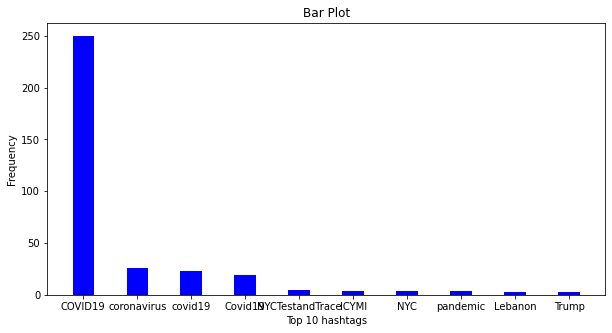

In [ ]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(hashtags10.index, hashtags10['id'], color ='blue', width = 0.4)
 
plt.xlabel("Top 10 hashtags")
plt.ylabel("Frequency")
plt.title("Bar Plot")
plt.show()

Finally, (6) let's visualize how many tweets are published every day:
- First, we group the tweets by day (disregarding the publication time).
- Second, we count the number of tweets for every day.
- Third, we plot the time line.





In [ ]:
df_day = df.set_index('date').groupby(pd.Grouper(freq='D')).count()[['user_name']]

Text(0, 0.5, 'Tweets')

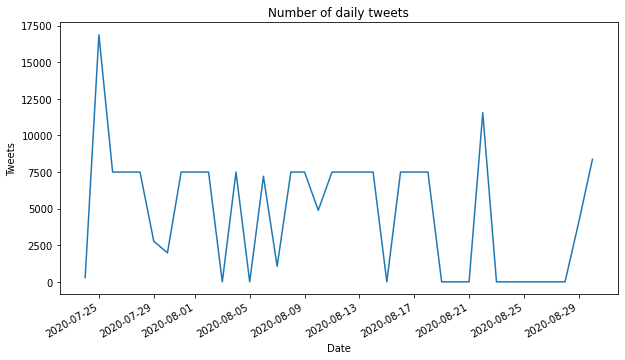

In [ ]:
fig = plt.figure(figsize = (10, 5))

plt.plot(df_day.index, df_day.user_name)
plt.title('Number of daily tweets')
plt.xticks(rotation=30, ha='right')
plt.xlabel('Date')
plt.ylabel('Tweets')

## Exercise 2
Now, try to repeat the same exercise but counting only re-tweets.

In [16]:
# write here your code

